In [1]:
import numpy as np

In [2]:
## from part 1c
def fcn(t,s):
    return 0.9*(2-np.sqrt(4-3*np.exp(4*np.pi*t*1j)))*np.exp(2*np.pi*t*(-s)*1j) +\
           0.1*(2-np.sqrt(4-3*np.exp(4*np.pi*t*1j)))**3 * np.exp(2*np.pi*t*(-s-2)*1j)

def Ps(s, num_partition=100):
    # using Trapezoidal rule to evaluate
    h = 1/num_partition
    ts = np.arange(h,1,h)
    val = (fcn(0,s) +2*sum(fcn(ts,s)) +fcn(1,s))*h/2
    return val.real

In [8]:
## find theoretical probabilities Ps in problem 1
set_s = range(2,37,2)
Pss = []
for s in set_s:
    Pss.append(Ps(s))

In [4]:
## generate graph
from pylab import *
import networkx as nx

def ggraph(p1,p3):
    stubs = 2*(np.random.choice(2,10000,p=[p1,p3]))+1
    while sum(stubs)//2 == 1:
        stubs = 2*np.random.choice(2,10000,p=[p1,p3])+1
    G = nx.random_degree_sequence_graph(list(stubs))
    return G

In [5]:
## Depth-first search
def DFS(G):
    N = 10000
    visited = np.zeros(N)
    parent = -np.ones(N)
    discover = np.zeros(N)
    finish = np.zeros(N)
    
    component = -np.ones(N)
    cur_component = 1
        
    tm = 0
    
    for u in range(N):
        if visited[u] == 0:
            component[u] = cur_component
            tm,discover,visited,component,parent,finish = DFS_visit(G,u,tm,discover,visited,component,parent,finish)
            cur_component += 1
    
    return visited, component, parent, discover, finish  

            
def DFS_visit(G,u,tm,discover,visited,component,parent,finish):
    tm += 1
    discover[u] = tm
    visited[u] = 0.5
    for v in G.neighbors(u):
        if visited[v] == 0:
            component[v] = component[u]
            parent[v] = u
            tm,discover,visited,component,parent,finish = DFS_visit(G,v,tm,discover,visited,component,parent,finish)
    visited[u] = 1
    tm += 1
    finish[u] = tm
    return tm,discover,visited,component,parent,finish

Text(0, 0.5, 'probability Ps')

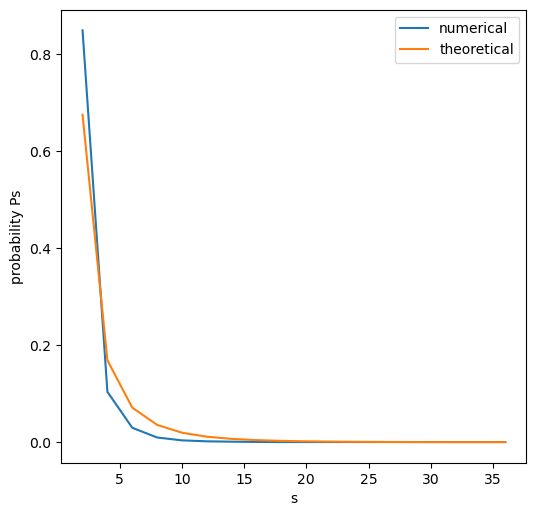

In [10]:
## graph without giant component
# p1 = 0.9
# p3 = 0.1
# G1 = ggraph(p1,p3)
# component1 = DFS(G1)[1]
# component_sizes1 = np.unique(component1, return_counts=True)[1]
# size1, freq1 = np.unique(component_sizes1, return_counts=True)

plt.figure(figsize=(6,6),dpi=100)
plt.plot(size1,freq1/sum(freq1),label='numerical')
plt.plot(set_s,Pss,label='theoretical')
plt.legend()
plt.xlabel('s')
plt.ylabel('probability Ps')

In [7]:
## graph with giant component
p1 = 0.5
p3 = 0.5
G2 = ggraph(p1,p3)
component2 = DFS(G2)[1]
component_sizes2 = np.unique(component2, return_counts=True)[1]
largest_comp_frac = np.max(component_sizes2)/10000
print(largest_comp_frac)

0.814


In [9]:
## results I got in part 1d
## compare with result in last cell
22/27

0.8148148148148148